In [5]:
import numpy
import scipy
import csv
import pandas as pd

In [6]:
# open the file in universal line ending mode 
df_train = pd.read_csv('train_modi.csv',delimiter=",")
df_test = pd.read_csv('test_modi.csv',delimiter=",")
df_train=pd.get_dummies(df_train)
df_test=pd.get_dummies(df_test)

In [7]:
df_train.head()

,age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek,wrkclass_Federal-gov,wrkclass_Local-gov,wrkclass_Private,wrkclass_Self-emp-inc,...,nativecountry_Scotland,nativecountry_South,nativecountry_Taiwan,nativecountry_Thailand,nativecountry_Trinadad&Tobago,nativecountry_United-States,nativecountry_Vietnam,nativecountry_Yugoslavia,income_<=50K,income_>50K
0,39,77516,13,2174,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,50,83311,13,0,0,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,38,215646,9,0,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,53,234721,7,0,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,28,338409,13,0,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
list(df_train)

['age',
 'fnlwgt',
 'educationnum',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'wrkclass_Federal-gov',
 'wrkclass_Local-gov',
 'wrkclass_Private',
 'wrkclass_Self-emp-inc',
 'wrkclass_Self-emp-not-inc',
 'wrkclass_State-gov',
 'wrkclass_Without-pay',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'maritalstatus_Married',
 'maritalstatus_Unmarried',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 'occupation_Protective-ser

In [35]:
df_train = df_train.drop(['educationnum'], 1)
df_test = df_test.drop(['educationnum'], 1)

In [37]:
df_train.columns.get_loc('nativecountry_Cambodia')

57

In [19]:
df_test.insert(72,'nativecountry_Holand-Netherlands',0)

In [11]:
df_test.insert(0,'Bias_Term',1)
df_train.insert(0,'Bias_Term',1)

In [38]:
list(df_test)

['Bias_Term',
 'age',
 'fnlwgt',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'wrkclass_Federal-gov',
 'wrkclass_Local-gov',
 'wrkclass_Private',
 'wrkclass_Self-emp-inc',
 'wrkclass_Self-emp-not-inc',
 'wrkclass_State-gov',
 'wrkclass_Without-pay',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'maritalstatus_Married',
 'maritalstatus_Unmarried',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 'occupation_Protective-serv',

In [13]:
list(df_train)

['Bias_Term',
 'age',
 'fnlwgt',
 'educationnum',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'wrkclass_Federal-gov',
 'wrkclass_Local-gov',
 'wrkclass_Private',
 'wrkclass_Self-emp-inc',
 'wrkclass_Self-emp-not-inc',
 'wrkclass_State-gov',
 'wrkclass_Without-pay',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'maritalstatus_Married',
 'maritalstatus_Unmarried',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 'occupation_

In [39]:
df_test.shape

(15310, 100)

In [40]:
df_train.shape

(30694, 100)

In [41]:
df_train.columns.difference(df_test.columns)

Index(['income_<=50K', 'income_>50K'], dtype='object')

In [26]:
#Accessing columns
df_train['age'].head()

0    39
1    50
2    38
3    53
4    28
Name: age, dtype: int64

In [36]:
#Accessing rows, columns
df_train.loc[df_train['age'] >= 50, 'age']

1        50
3        53
7        52
21       54
24       59
25       56
27       54
41       53
45       57
46       53
53       50
67       53
74       79
77       67
81       52
83       59
85       53
90       57
100      76
112      56
115      53
116      56
118      55
140      61
144      70
148      64
154      52
157      71
160      68
169      66
         ..
32448    61
32454    50
32459    85
32460    62
32463    58
32465    66
32467    55
32469    58
32470    50
32479    64
32481    52
32487    51
32489    61
32490    60
32494    82
32498    57
32501    71
32504    50
32507    50
32515    66
32518    57
32522    58
32525    81
32533    54
32539    71
32542    72
32548    65
32554    53
32558    58
32560    52
Name: age, dtype: int64

In [42]:
data_train=df_train.as_matrix()
data_test=df_test.as_matrix()

In [45]:
X_train=[d[0:57] for d in data_train]
X_test=[d[0:57] for d in data_test]
Y_train=[d[99] for d in data_train]
Y_test=[d[99] for d in data_test]

In [46]:
X_train=numpy.matrix(X_train)
X_test=numpy.matrix(X_test)
Y_train=numpy.matrix(Y_train)
Y_train=numpy.ravel(Y_train)
Y_test=numpy.matrix(Y_test)
Y_test=numpy.ravel(Y_test)

In [47]:
X_test.shape

(15310, 57)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# instantiate
logreg = LogisticRegression()

# fit
logreg.fit(X_train, Y_train)

# predict
y_pred = logreg.predict(X_test)

print('LogReg %s' % metrics.accuracy_score(Y_test, y_pred))

LogReg 0.792619203135


In [49]:
y_pred = logreg.predict(X_train)
print('LogReg %s' % metrics.accuracy_score(Y_train, y_pred))

LogReg 0.790838600378


In [33]:
from sklearn.ensemble import ExtraTreesClassifier
extree = ExtraTreesClassifier()
extree.fit(X_train, Y_train)

# display the relative importance of each attribute
extree.feature_importances_

array([  0.00000000e+00,   1.56523668e-01,   1.75164718e-01,
         2.99330020e-02,   6.30870011e-02,   2.14897174e-02,
         9.46970734e-02,   5.05621453e-03,   4.92326469e-03,
         8.79870395e-03,   6.26924689e-03,   8.26363623e-03,
         4.76026771e-03,   7.73061799e-05,   2.09709314e-03,
         2.39159631e-03,   1.10286791e-03,   3.39898711e-04,
         6.83978342e-04,   2.85050427e-03,   1.77693896e-03,
         2.93939291e-03,   3.39457405e-03,   1.70341640e-02,
         4.38125368e-03,   1.21409534e-02,   9.55385909e-03,
         5.62331389e-05,   5.96715979e-03,   5.97800078e-03,
         9.44879365e-02,   5.17192093e-02,   4.82746635e-03,
         2.95828803e-05,   6.61343439e-03,   2.00899673e-02,
         4.84760203e-03,   4.45428003e-03,   4.31573547e-03,
         8.04530374e-03,   2.08356282e-04,   2.21339800e-02,
         2.47235186e-03,   6.06659803e-03,   4.07381371e-03,
         4.70233205e-03,   2.21327953e-02,   7.42912933e-03,
         2.08655237e-03,

In [34]:
from sklearn.neighbors import KNeighborsClassifier
k_range = numpy.arange(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test, y_pred))
print(scores.index(max(scores)), max(scores))

24 0.795819725669


In [52]:
import matplotlib.pyplot as plt
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.grid(True)

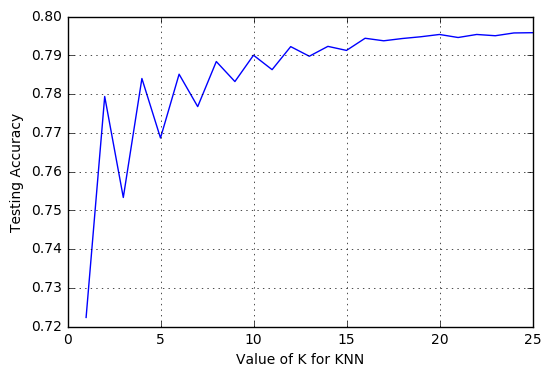

In [53]:
plt.show()

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(Y_test, y_pred)

0.80522534291312864

In [50]:
gbc = GradientBoostingClassifier().fit(X_train, Y_train)
print('GBC %s' % gbc.score(X_train, Y_train))

GBC 0.863198019157


In [51]:
print('GBC %s' % gbc.score(X_test, Y_test))

GBC 0.863291966035


In [47]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, Y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
clf.score(X_test,Y_test)

0.76039555309870399

In [48]:
clf.score(X_train,Y_train)

0.96065845643561321

In [15]:
y=[(data[i][14]==' >50K') for i in range(len(data))]

In [16]:
y[:10]

[False, False, False, False, False, False, False, True, True, True]

In [17]:
temp_pos=[]
temp_neg=[]
for i in range(len(data)):
    if (y[i]==1):
        temp_pos.append(data[i][2])
    else:
        temp_neg.append(data[i][2])
        

In [18]:
max(temp_pos)

1226583

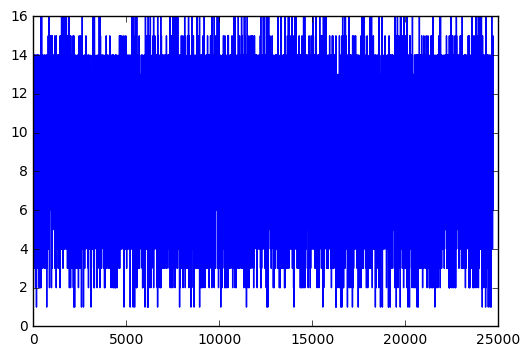

In [16]:
import matplotlib.pyplot as plt

plt.plot(range(len(temp_neg)),temp_neg)
plt.show()

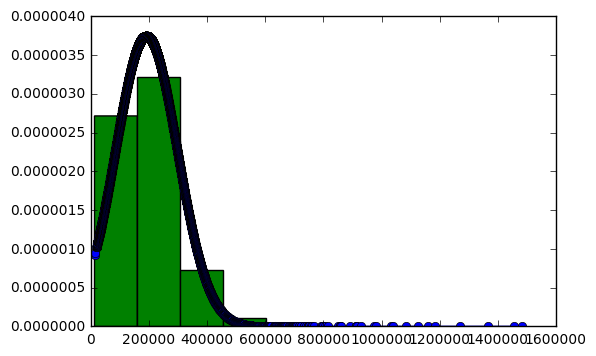

In [19]:
import numpy as np
import scipy.stats as stats
import pylab as pl

h = sorted(temp_neg)  #sorted

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h,normed=True)      #use this to draw histogram of your data

pl.show()                   #use may also need add this 

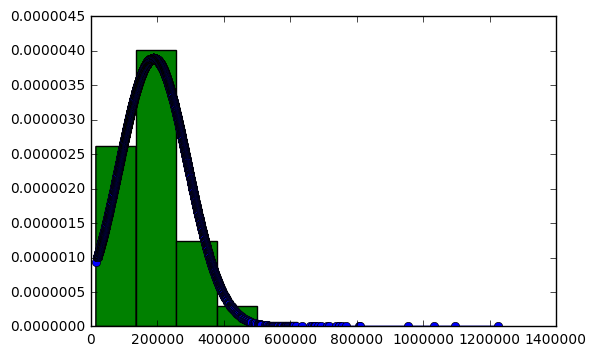

In [20]:
import numpy as np
import scipy.stats as stats
import pylab as pl

h = sorted(temp_pos)  #sorted

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h,normed=True)      #use this to draw histogram of your data

pl.show()                   #use may also need add this 